In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\sajad\Datasets\worldpopulationreview.csv")

# Display the structure of the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country Name           234 non-null    object
 1   Population (Jan 2024)  224 non-null    object
 2   Population(2023)       234 non-null    object
 3   Area(km)               234 non-null    object
 4   Land Area (Km)         234 non-null    object
 5   Density(/Km)           234 non-null    object
 6   Growth Rate            232 non-null    object
 7   World%                 177 non-null    object
 8   Rank                   234 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 16.6+ KB
None


In [15]:
# Display the number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 234
Number of columns: 9


In [16]:
# Display the first few rows of the dataset
print(df.head())

    Country Name Population (Jan 2024) Population(2023) Area(km)  \
0          India         1,436,397,893    1,428,627,663     3.3M   
1          China         1,425,436,213    1,425,671,352     9.7M   
2  United States           341,075,762      339,996,563     9.4M   
3      Indonesia           278,883,459      277,534,122     1.9M   
4       Pakistan           243,270,676      240,485,658   881.9K   

  Land Area (Km) Density(/Km) Growth Rate  World%  Rank  
0             3M          485       0.92%  18.01%     1  
1           9.4M          151      -0.03%   17.8%     2  
2           9.1M           37       0.53%   4.27%     3  
3           1.9M          149       0.82%    3.5%     4  
4         770.9K          318       1.96%   3.06%     5  


In [17]:
# Display the column names
print(df.columns)

Index(['Country Name', 'Population (Jan 2024)', 'Population(2023)', 'Area(km)',
       'Land Area (Km)', 'Density(/Km)', 'Growth Rate', 'World%', 'Rank'],
      dtype='object')


In [18]:
# Count the number of unique countries
num_countries = df['Country Name'].nunique()

# Display the number of countries
print("Number of countries included:", num_countries)

Number of countries included: 234


In [19]:
# Find the country with the highest population density
country_highest_density = df.loc[df['Density(/Km)'].idxmax(), 'Country Name']
highest_density = df['Density(/Km)'].max()

# Display the country with the highest population density
print("Country with the highest population density:", country_highest_density)
print("Population density:", highest_density)

Country with the highest population density: Kenya
Population density: 99


In [20]:
# Find the country with the smallest land area
country_smallest_land_area = df.loc[df['Land Area (Km)'].idxmin(), 'Country Name']
smallest_land_area = df['Land Area (Km)'].min()

# Display the country with the smallest land area
print("Country with the smallest land area:", country_smallest_land_area)
print("Land area:", smallest_land_area)

Country with the smallest land area: Hong Kong
Land area: 1.1K


In [21]:
# Specify the country
country_name = "United States"

# Find the rank of the specified country based on population in January 2024
country_rank = df[df['Country Name'] == country_name]['Rank'].values[0]

# Display the rank of the specified country
print(f"Rank of {country_name} based on population in January 2024:", country_rank)

Rank of United States based on population in January 2024: 3


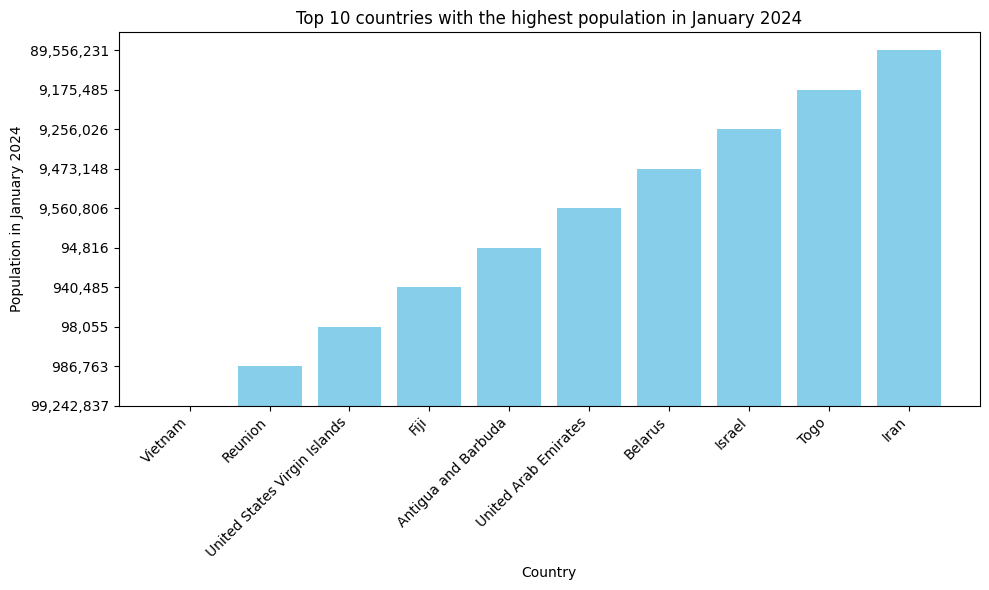

In [22]:
#Top 10 countries with the highest population in January 2024
#%pip install matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Sort the dataframe by population in January 2024 in descending order
top_10_population_2024 = df.sort_values(by='Population (Jan 2024)', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_population_2024['Country Name'], top_10_population_2024['Population (Jan 2024)'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Population in January 2024')
plt.title('Top 10 countries with the highest population in January 2024')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

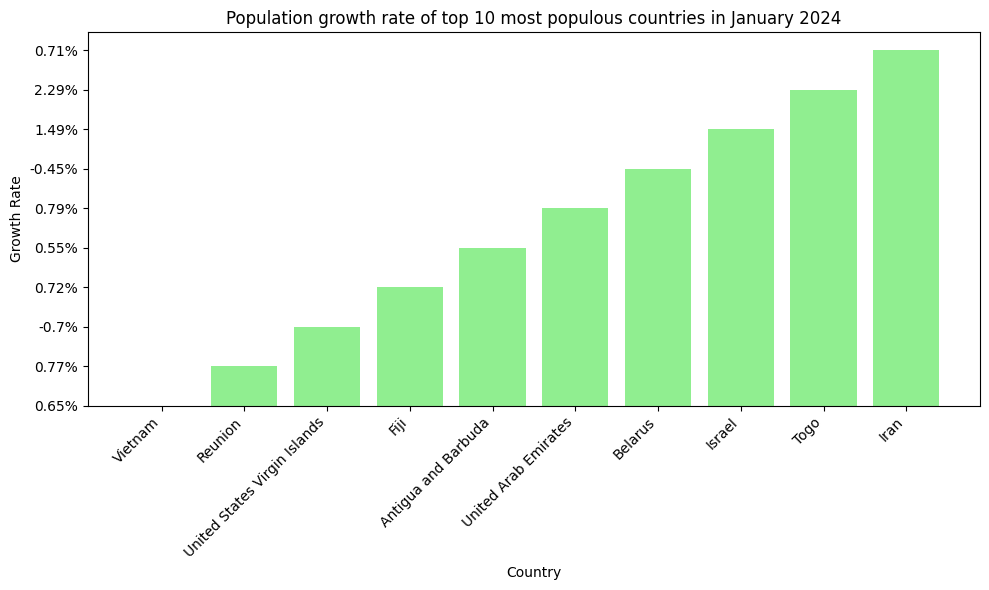

In [23]:
# Population growth rate of top 10 most populous countries in January 2024
# Sort the dataframe by population in January 2024 in descending order
top_10_population_2024 = df.sort_values(by='Population (Jan 2024)', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_population_2024['Country Name'], top_10_population_2024['Growth Rate'], color='lightgreen')
plt.xlabel('Country')
plt.ylabel('Growth Rate')
plt.title('Population growth rate of top 10 most populous countries in January 2024')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

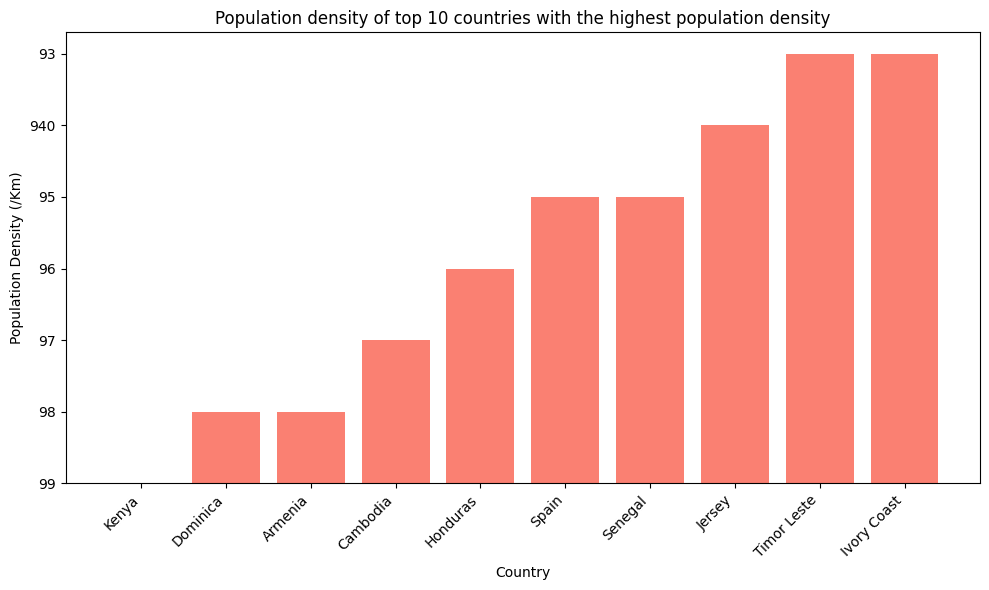

In [24]:
# Sort the dataframe by population density in descending order
top_10_density = df.sort_values(by='Density(/Km)', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_density['Country Name'], top_10_density['Density(/Km)'], color='salmon')
plt.xlabel('Country')
plt.ylabel('Population Density (/Km)')
plt.title('Population density of top 10 countries with the highest population density')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

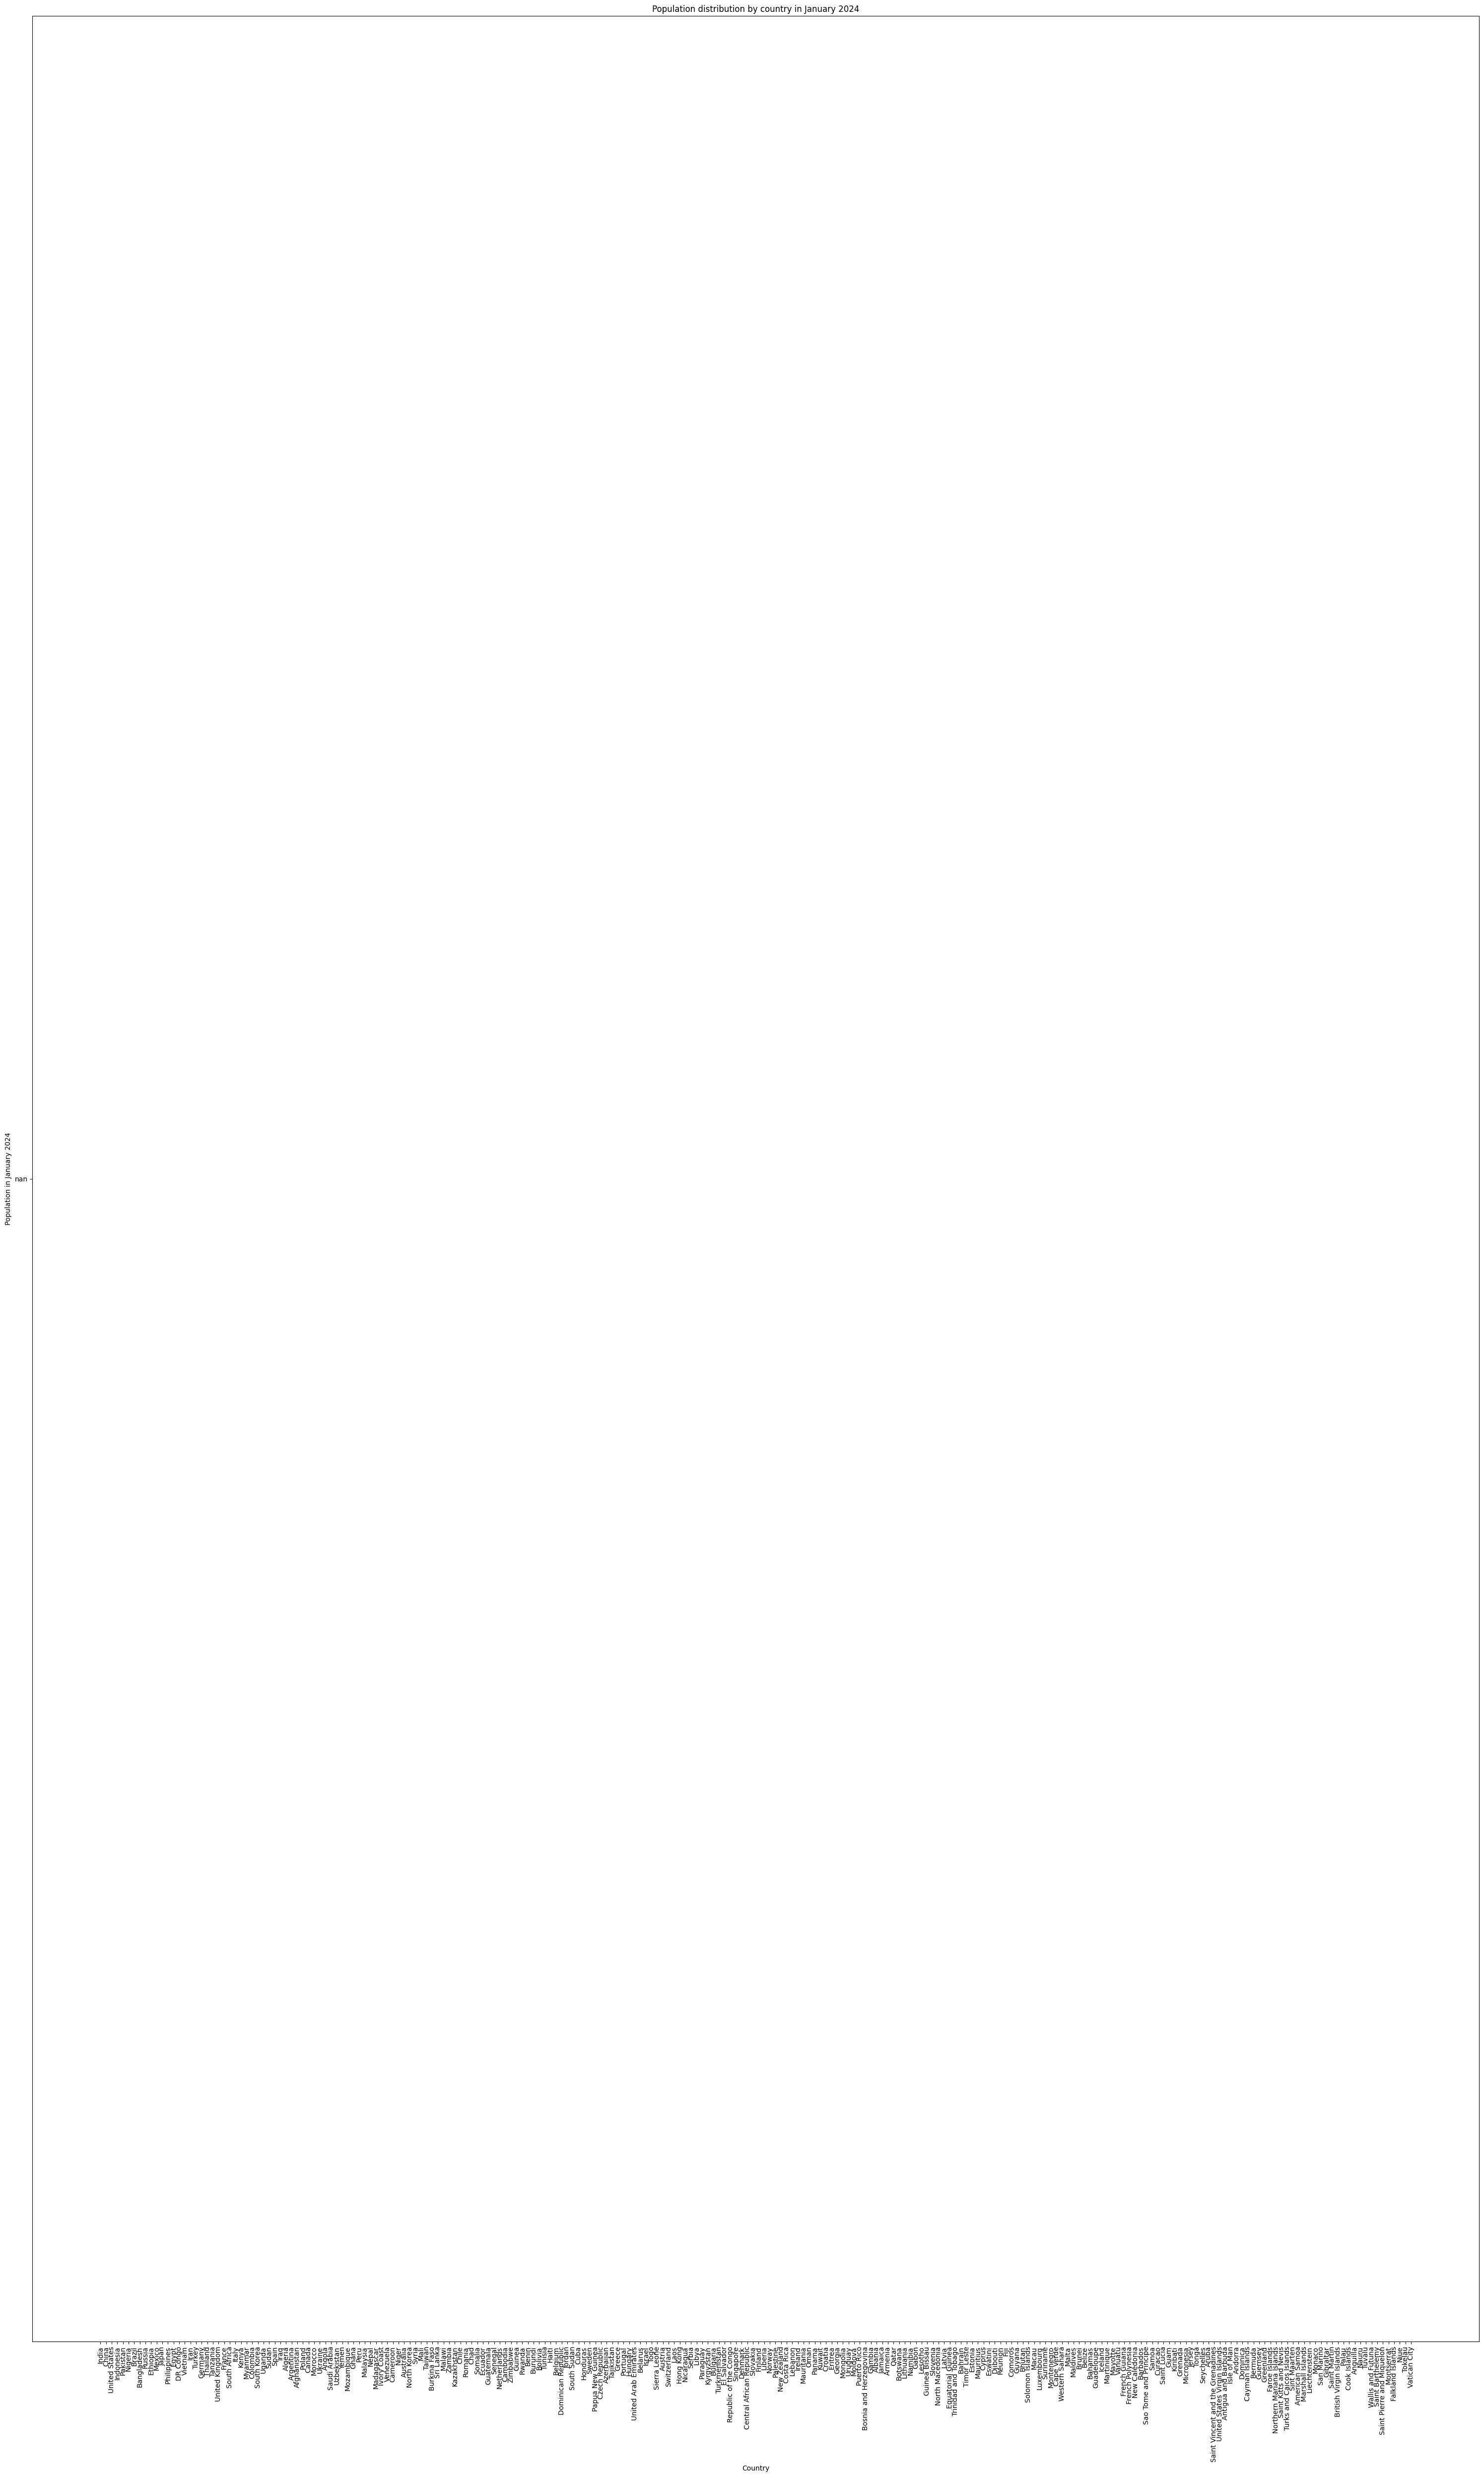

In [35]:
# Population distribution by country in January 2024
# Create the bar plot
plt.figure(figsize=(30, 50))
plt.bar(df['Country Name'], df['Population (Jan 2024)'].astype(str), color='royalblue')
plt.xlabel('Country')
plt.ylabel('Population in January 2024')
plt.title('Population distribution by country in January 2024')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

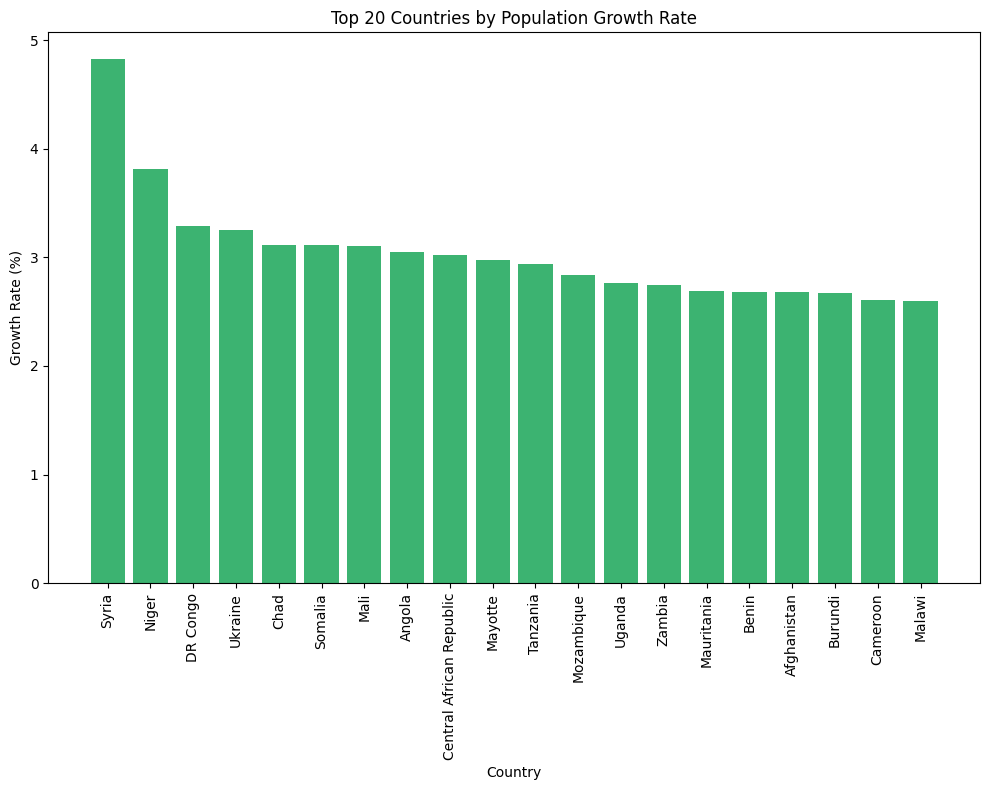

In [31]:
# 
# Assuming 'df' is your DataFrame and it's already loaded with data
# including 'Country Name' and 'Growth Rate' columns.

# Ensure 'Growth Rate' column is string type and remove percentage sign
df['Growth Rate'] = df['Growth Rate'].astype(str).str.replace('%', '')

# Handle any non-numeric entries and convert to float
df['Growth Rate'] = pd.to_numeric(df['Growth Rate'], errors='coerce')

# Sort the DataFrame based on 'Growth Rate' in descending order
df_sorted = df.sort_values('Growth Rate', ascending=False)

# Select the top 20 countries
df_top20 = df_sorted.head(20)

# Create the bar plot for the top 20 countries
plt.figure(figsize=(10, 8))  # Set the size of the figure
plt.bar(df_top20['Country Name'], df_top20['Growth Rate'], color='mediumseagreen')  # Create the bar plot
plt.xlabel('Country')  # Label for x-axis
plt.ylabel('Growth Rate (%)')  # Label for y-axis
plt.title('Top 20 Countries by Population Growth Rate')  # Title of the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout
plt.show()  # Display the plot

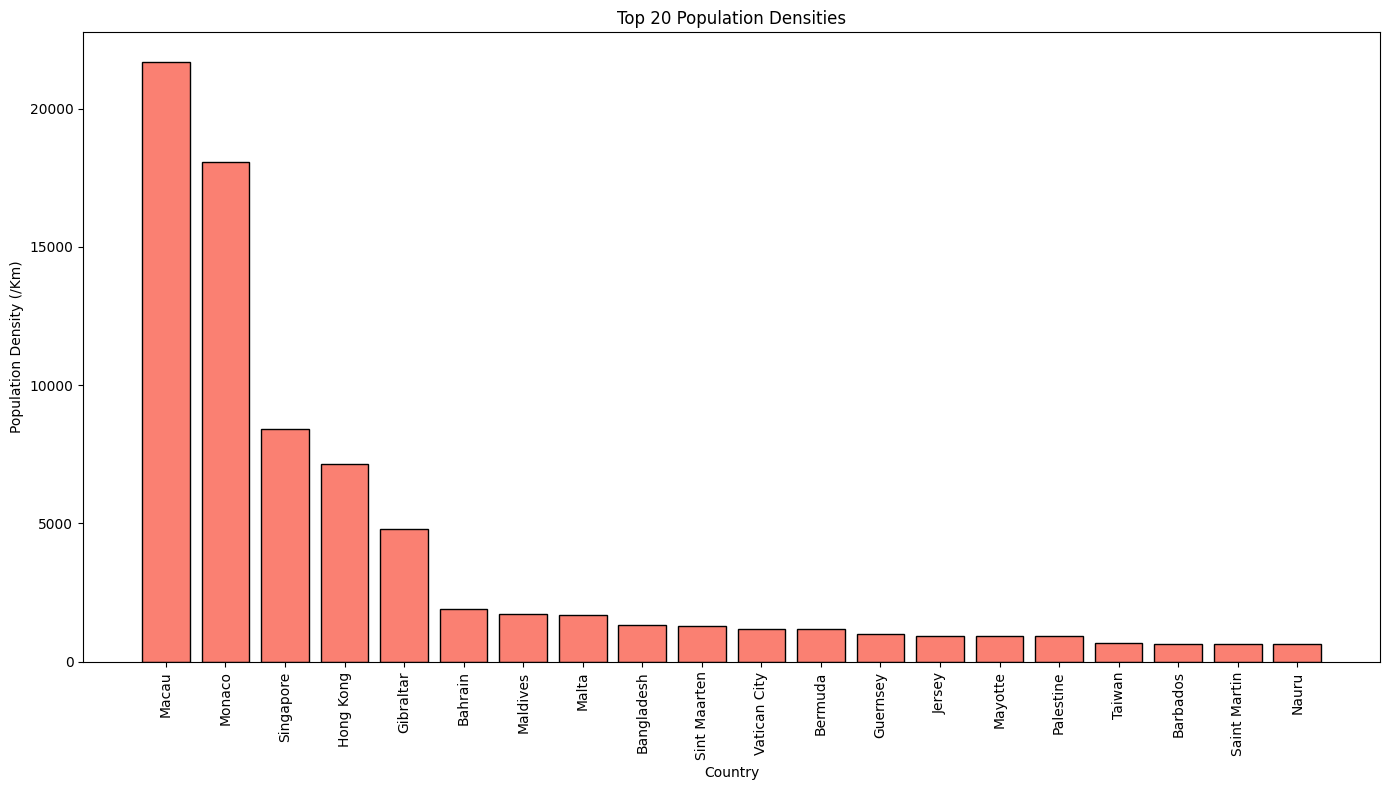

In [33]:
#Distribution of Population Density

# Convert 'Density(/Km)' to float after removing any non-numeric characters if necessary
# For example, if 'Density(/Km)' contains commas as thousands separators, they need to be removed
df['Density(/Km)'] = df['Density(/Km)'].astype(str).str.replace(',', '').astype(float)

# Sort the DataFrame based on 'Density(/Km)' in descending order
df_sorted = df.sort_values('Density(/Km)', ascending=False)

# Select the top 20 densities
df_top20 = df_sorted.head(20)

# Create the bar chart for the top 20 population densities
plt.figure(figsize=(14, 8))  # Set the size of the figure
plt.bar(df_top20['Country Name'], df_top20['Density(/Km)'], color='salmon', edgecolor='black')
plt.xlabel('Country')  # Label for x-axis
plt.ylabel('Population Density (/Km)')  # Label for y-axis
plt.title('Top 20 Population Densities')  # Title of the chart
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout
plt.show()  # Display the chart


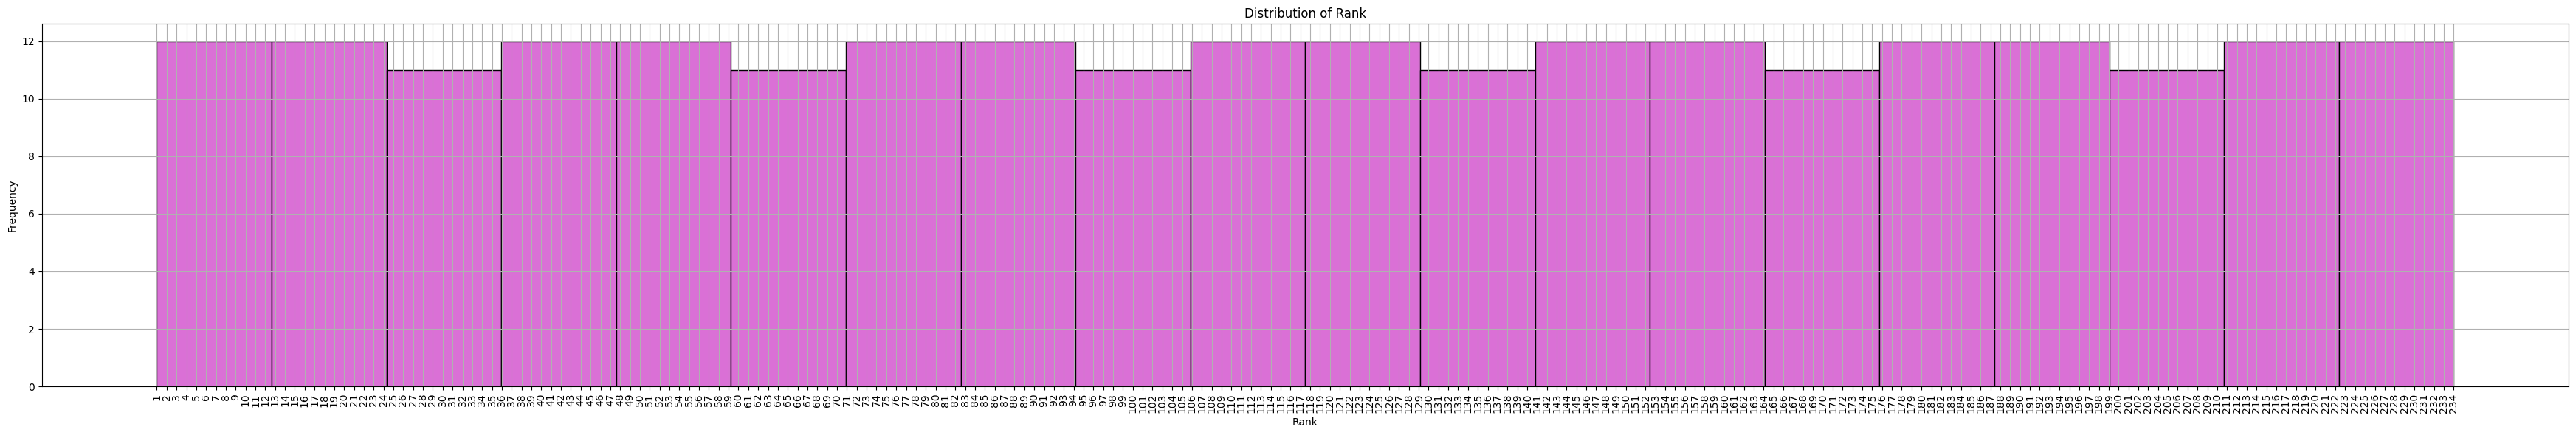

In [38]:
# Distribution of Rank 

# Create the histogram
plt.figure(figsize=(35, 6))
plt.hist(df['Rank'].astype(str), bins=20, color='orchid', edgecolor='black')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Distribution of Rank')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()